In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
dataset=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [71]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      245 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [73]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the dataset is divided into 2 parts based on regins from index 123

In [74]:
dataset.drop(122,inplace=True)
dataset.iloc[120:125]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [75]:
dataset.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Name: 123, dtype: object

In [76]:
dataset.loc[:123,'region']=0
dataset.loc[123:,'region']=1

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      245 non-null    object 
 14  region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 38.9+ KB


In [78]:
dataset[['region']]=dataset[['region']].astype(int)

In [79]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [80]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
region         0
dtype: int64

In [81]:
dataset.dropna().reset_index(drop=True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
241,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
242,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
243,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [82]:
dataset.isnull().sum()


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
region         0
dtype: int64

In [83]:
dataset.iloc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [84]:
dataset=dataset.drop(123).reset_index(drop=True)

In [85]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [86]:
dataset=dataset.drop(122).reset_index(drop=True)

In [87]:
dataset.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [88]:
dataset.columns=dataset.columns.str.strip()
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [89]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.8+ KB


changing the eqd cols to int 

In [90]:
dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int32 
 1   month        244 non-null    int32 
 2   year         244 non-null    int32 
 3   Temperature  244 non-null    int32 
 4   RH           244 non-null    int32 
 5   Ws           244 non-null    int32 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.1+ KB


changing to float

In [92]:
objects=[features for features in dataset.columns if dataset[features].dtype=='O']

In [93]:
dataset[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=dataset[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.1+ KB


In [95]:
dataset.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [96]:
dataset.to_csv('Algerian_forest_fires_cleaned_dataset.csv')

## EDA

In [97]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [98]:
df_copy=dataset.drop(['day','month','year'],axis=1)

In [99]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [100]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [101]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [102]:
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [103]:
import seaborn as sns

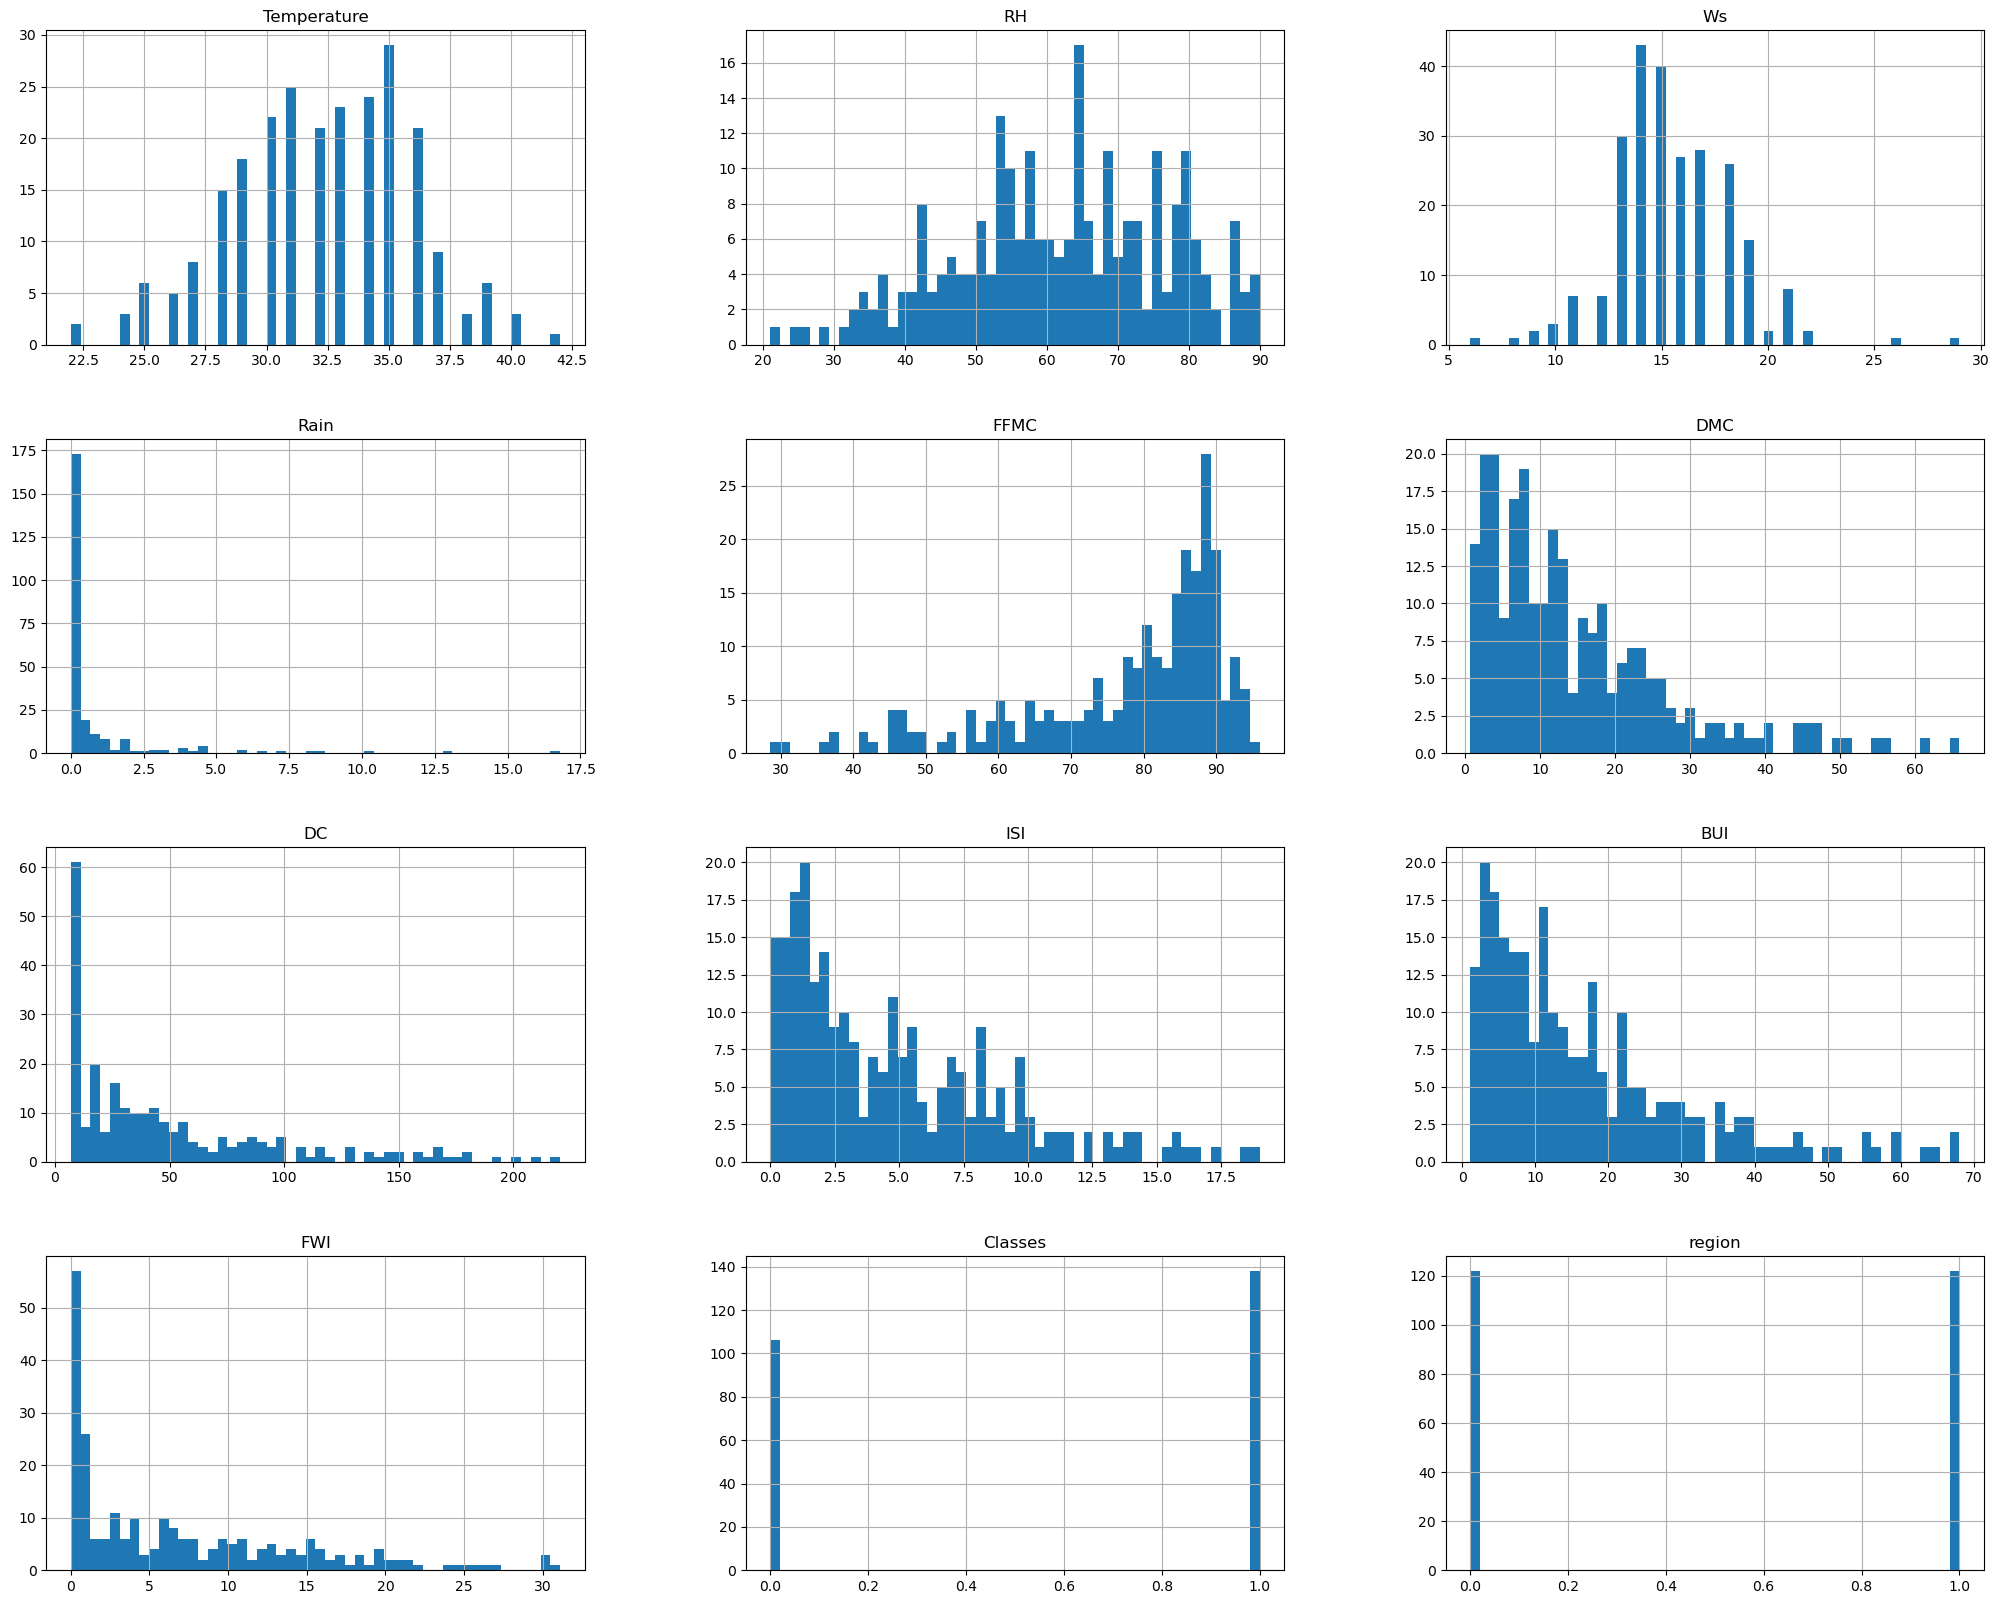

In [104]:
# density plot for all features

df_copy.hist(bins=50,figsize=(25,20))
plt.show()

In [105]:
# % for pie charts
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [106]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

([<matplotlib.patches.Wedge at 0x1d25b1026c0>,
 [Text(-0.22500720993803214, 1.0767412667284106, 'fire'),
  Text(0.2250071091262376, -1.0767412877951015, 'not fire')],
 [Text(-0.12273120542074478, 0.5873134182154967, '56.6%'),
  Text(0.12273115043249322, -0.5873134297064189, '43.4%')])

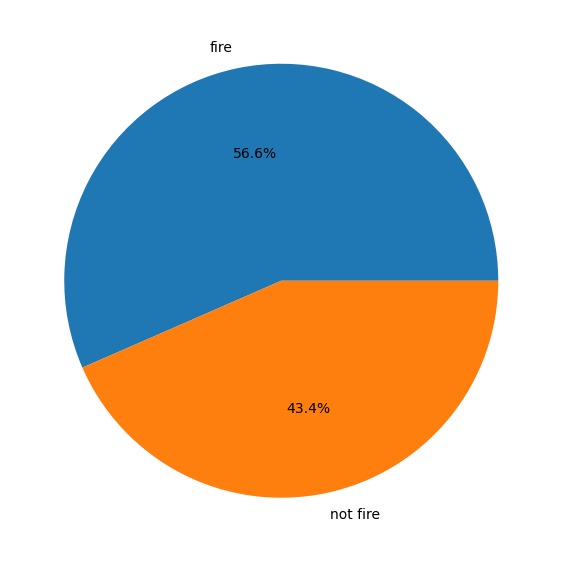

In [107]:
classlabels=['fire','not fire']
plt.figure(figsize=(7,10))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')

In [108]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,-0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142,0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.584545,0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.719407,0.198474


<Axes: >

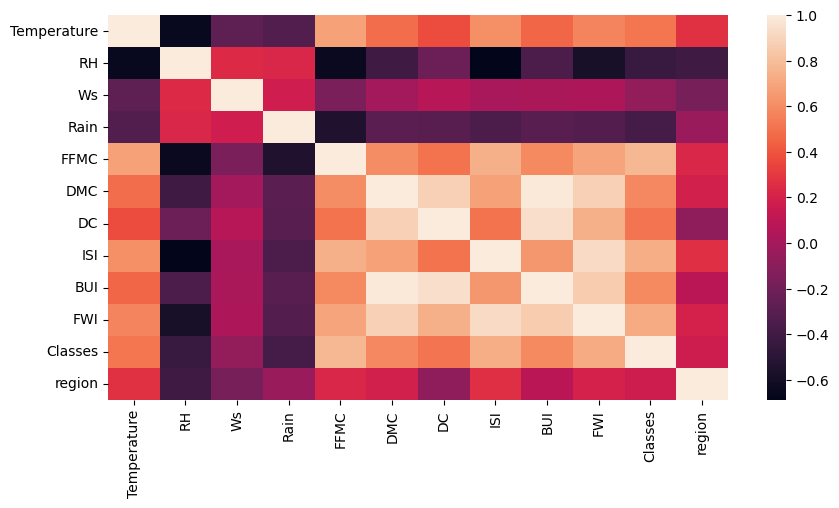

In [109]:
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

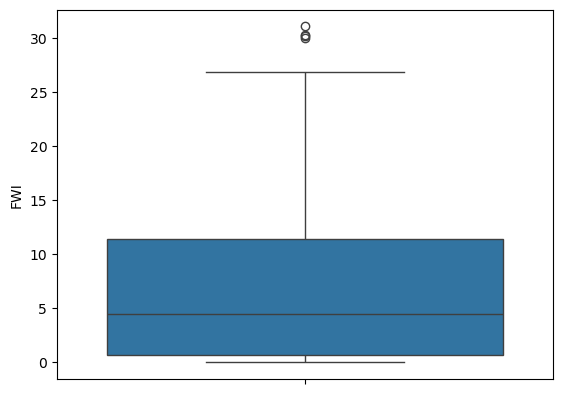

In [110]:
sns.boxplot(df_copy['FWI'])

In [111]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
# monthly fire analysis
df_fire_notfire=dataset.copy()

In [113]:
df_fire_notfire['Classes']=np.where(df_fire_notfire['Classes'].str.contains('not fire'),'not fire','fire')

In [116]:
df_fire_notfire['Classes'].value_counts()

Classes
fire        138
not fire    106
Name: count, dtype: int64

Text(0.5, 1.0, 'fire analysis for sidi-bel region')

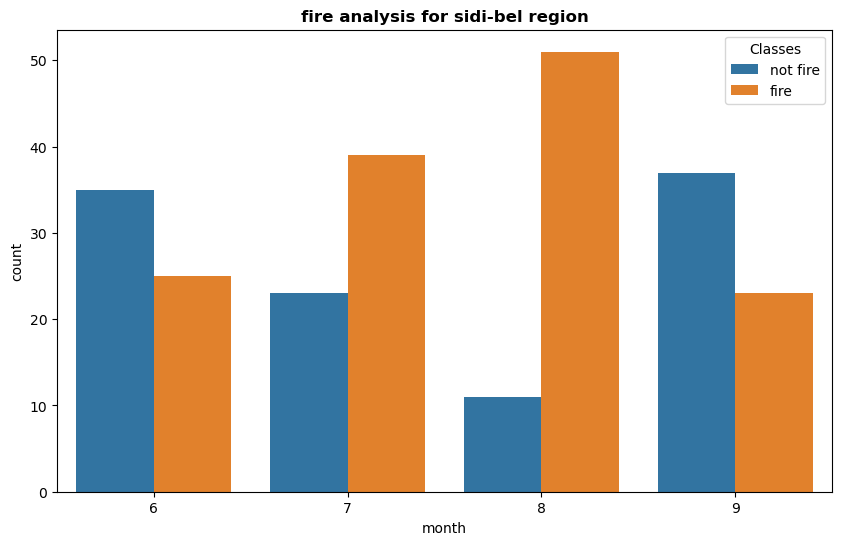

In [119]:
# monthly fire analysis
aftemp=df_fire_notfire.loc[df_fire_notfire['region']==1]
plt.subplots(figsize=(10,6))
sns.countplot(x='month',hue='Classes',data=df_fire_notfire)
plt.title('fire analysis for sidi-bel region',weight='bold')

Text(0.5, 1.0, 'fire analysis for brjai region')

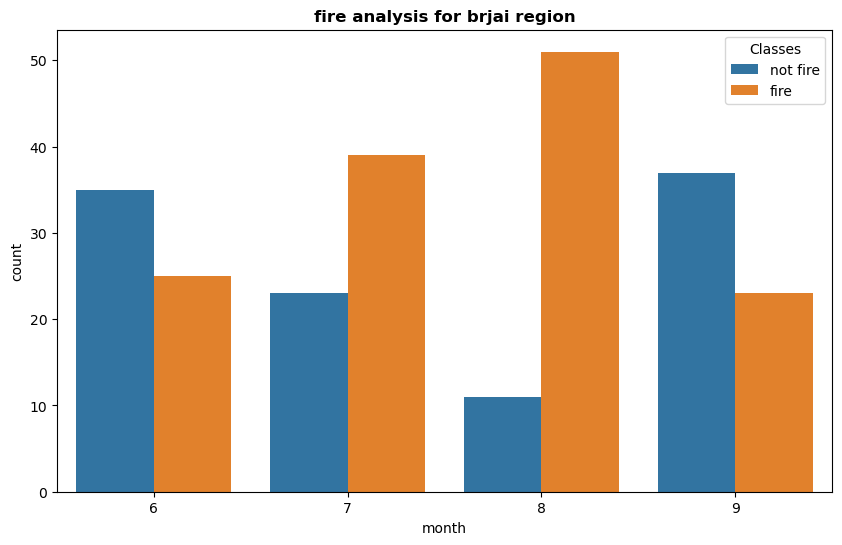

In [120]:
# monthly fire analysis
aftemp=df_fire_notfire.loc[df_fire_notfire['region']==0]
plt.subplots(figsize=(10,6))
sns.countplot(x='month',hue='Classes',data=df_fire_notfire)
plt.title('fire analysis for brjai region',weight='bold')

in aug and sept , most numb of fires